# Final Project - Eric Steele, Liam Tiemon, Mate Virag
### Variant 2 - Analysis and Comparison of Gluon, PyTorch and TensorFlow
May 4, 2018  
Dr. Kevin Kirby  
CSC 494

# Installation 
___

### Gluon
___

#### For Mac:
1. Go to terminal
    * Optional: create a new virtual environment or open a virtual environment
2. Run these commands
    * pip install gluon
    * pip install mxnet

#### For Windows:
1. Go to http://landinghub.visualstudio.com/visual-cpp-build-tools and download and install the C++ compiler.
2. Go to Anaconda prompt
    * Optional: create a new virtual environment or open a virtual environment
3. Run these commands
    * pip install gluon
    * pip install mxnet
    

### PyTorch
___
#### For Mac:
1. Go to terminal
    * Optional: create a new virtual environment or open a virtual environment
2. Go to PyTorch's website (http://pytorch.org) and specify your desired configuration
3. Run the returned pip or conda command to install PyTorch

#### For Windows:
1. Go to Anaconda prompt
    * Optional: create a new virtual environment or open a virtual environment
2. Go to PyTorch's website (http://pytorch.org) and specify your desired configuration
3. Run the returned pip or conda command to install PyTorch

# Documentation 

---

## Gluon

* http://gluon.mxnet.io contains most of the information required to get started, had code examples, and good documentation.
    * This helped us get our project up and going. Following their tutorial helped us get our CNN started and from there we were able to change it to our liking. 
* http://mxnet.incubator.apache.org/api/python/index.html contains tutorials and documentation for APIs.
    * It's API documentation helped us determine which APIs were needed for layers in our CNN.
    
## PyTorch

* There isn't much PyTorch documentation besides the base documentation from the developers and a few GitHub repositories.
* PyTorch's [website](https://pytorch.org/tutorials/index.html) has enough code examples to get you started, but not enough to get you in a good place with a CNN
* https://github.com/utkuozbulak/pytorch-custom-dataset-examples
    * This GitHub repository was a huge help in getting NkuMyaDevMaker.py up and running with PyTorch's network.
* https://github.com/pytorch/examples
    * The official PyTorch GitHub repository was useful to implement layer connections, defining the network, making drop out, and how to use the activation functions.

# Ease of Use
___

## Network

___

#### Gluon

In [1]:
#imports necessary
import mxnet as mx
from mxnet import gluon, autograd, ndarray
import numpy as np
import matplotlib.pyplot as plt

# Initialize the model
net = gluon.nn.Sequential()
    
# Declare hyperparameters
convo1_kernels = 20
convo1_kernel_size = (5,5)
convo2_kernels = 40
convo2_kernel_size = (5,5)
pooling = 2

hidden1_neurons = 20
dropout_rate = 0.3
hidden2_neurons = 15

# Define our network
with net.name_scope():
    net.add(gluon.nn.Conv2D(channels=convo1_kernels, kernel_size=convo1_kernel_size, use_bias=True, activation='relu'))
    net.add(gluon.nn.MaxPool2D(pool_size=pooling, strides=pooling))
    net.add(gluon.nn.BatchNorm())
    net.add(gluon.nn.Conv2D(channels=convo2_kernels, kernel_size=convo2_kernel_size, use_bias=True, activation='relu'))
    net.add(gluon.nn.MaxPool2D(pool_size=pooling, strides=pooling))
    net.add(gluon.nn.Flatten())
    net.add(gluon.nn.Dense(hidden1_neurons, activation="relu", use_bias=True))
    net.add(gluon.nn.Dropout(dropout_rate))
    net.add(gluon.nn.Dense(hidden2_neurons, activation="relu", use_bias=True))
    net.add(gluon.nn.Dense(1, activation="sigmoid", use_bias=True)) # Output layer

Defining a network in Gluon is similar to TensorFlow. It offers the same types of convolutional and dense layers with very similar lists of parameters that can be passed in to them. It also offers features, such as batch normalization, dropout and image flattening just like TensorFlow.

### PyTorch
---

In [2]:
#imports used
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data.dataset import Dataset
from torch.autograd import Variable

"""Class that defines the neural network."""
class Net(nn.Module):
    """Defines the layers in the neural network."""
    def __init__(self, depth, nk, kernel_size, padding, hidden_neurons, nc):
        super(Net, self).__init__()
        # out_channels defines the number of kernels
        self.conv1 = nn.Conv2d(in_channels=depth, out_channels=nk[0], kernel_size=kernel_size, padding=padding)
        self.conv2 = nn.Conv2d(in_channels=nk[0], out_channels=nk[1], kernel_size=kernel_size)
        #self.conv2_drop = nn.Dropout2d()
        # nc is the image size after convolution and pooling
        self.fc1 = nn.Linear(nc * nc * nk[1], hidden_neurons[0])
        self.fc2 = nn.Linear(hidden_neurons[0], hidden_neurons[1])
        # Single value output
        self.fc3 = nn.Linear(hidden_neurons[1], 1)

    """
    Defines the connections and the activation functions between layers, pushes the 
    input patterns through the network and returns the network's output.
    """
    def forward(self, x, pooling):
        # Max pooling over a square window with stride of pool size to avoid overlaps
        # Activatin functions are specified in this function even for the convolutional layer
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=pooling, stride=pooling)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=pooling, stride=pooling)
        #x = F.max_pool2d(F.relu(self.conv2_drop(self.conv2(x))), kernel_size=pooling, stride=pooling)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x

    """
    Calculates the size of the flat array for the input of the first dense layer 
    after the last convolutional layer.
    """
    def num_flat_features(self, x):
        size = x.size()[1:]  # All dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

Defining a network in PyTorch is a lot different than in Gluon or TensorFlow because it is a low-level framework compared to the other two frameworks we used. PyTorch requires a class inheriting from torch.nn.Module to be implemented when creating a neural network. This class is generally implemented using three functions that define the network. The \__init\__ function defines the layers in the neural network, however, PyTorch defines these layers at a much lower level than TensorFlow or Gluon. For example, PyTorch requires the user to calculate the number of input and output channels for each layer, while TensorFlow and Gluon automatically handled those calculations. Furthermore, PyTorch doesn't allow the user to define the activation function for the layers, instead, it requires the user to push the activations through an activation function manually prior to passing the output as the input of the next layer.  
  
The forward function defines the activation function between layers and how the layers created in \__init\__ are connected to each other. It also implements pooling for the convolutional layers. Furthermore, forward is used to push the input patterns through the network and it returns the output of the NN.  
  
Finally, the function num_flat_features simply calculates the size of the flat array for the input of the first dense layer after the last convolutional layer.  
  
Overall, defining a network in PyTorch required a lot more effort and implementation than TensorFlow and Gluon due to the low-level nature of the framework. Since the user is requied to calculate the number of input and output channels for each layer, there is also a higher possibility of errors in the implementation than in TensroFlow or Gluon. Therefore, our conclusion is that TensorFlow and Gluon are more advanced than PyTorch in netowkr implementation.

## Built-in features
___

### Gluon
* Batching was automatically done based on a parameter passed into the DataLoader.
* Gluon includes a wide variety of pre-implemented basic, convolutional, pooling and activation layers varying from 1D to 3D convolutional layers, dense, dropout and batch normalization layers, as well as the regular activation and pooling layers.
* Input channels are automatically computed between layers.
* Batch normalization and dropout functions are pre implemented.
* Image flattening calculations are automatically done.
* You can pass in activation functions, much like TensorFlow.
* Parameter specification in methods had a wide range of options.

### PyTorch
* Low level implementation of features compared to TensorFlow and Gluon, such as defining networks and activation functions between layers, as well as the variety of layers offered. For example, PyTorch doesn't offer a pre-implemented batch normalization layer like TensorFlow and Gluon, and defining a dropout layer is also more complicated than in the other two frameworks.
* Batching was automatically done based on a parameter passed into the DataLoader.

## Implemented features
___

### Accuracy Function

In [3]:
"""
Accuracy function for a two-class classifier. Receieves real numbers where one class
is associated with 0.0 and the other with 1.0. A prediction within 0.33 of the
label is considered a correct result. The function returns the number of
correct classifications across a batch of predictions and labels.
"""
def accuracy(predictions, labels):
    # Convert mxnet NDArrays to numpy NDArrays
    pred = predictions.asnumpy()[:,0]
    lab = labels.asnumpy()[:,0]
    correct = 0
    for i in range(len(pred)):
        if abs(pred[i] - lab[i]) < 0.33:
            correct += 1
    return correct

#### Gluon and PyTorch
When attempting to design our own network in Gluon, we initially ran into difficulty with the accuracy function. The built-in version mx.metric.Accuracy is intended for use with one-hot outputs, but we designed our network to use a single output to match the design of the TensorFlow network from HW4. This discrepancy caused our result to consistently be 50% accuracy. Once we identified this issue we wrote our own accuracy function to match the formula used in TfCnn-MyaDev_For_HW4.py, we identified that the networks were in fact learning. We were able to use this function with both Gluon and PyTorch.

### Dataset and DataLoader

In [4]:
import mxnet as mx

class MyaDevDataset(mx.gluon.data.Dataset):
    def __init__(self, X, Y, transform=None):
        self.X = X                  # NkuMyaDevMaker images
        self.Y = Y                  # NkuMyaDevMaker labels
        self.transform = transform  # Transformation function (optional)
    
    def __len__(self):
        return self.Y.shape[0]
    
    def __getitem__(self, idx):
        item = (self.X[idx], self.Y[idx])
        
        if self.transform:
            item = self.transform(item)
        
        return item

#### Gluon and PyTorch
We initially tried to use Numpy arrays to pass our training and test images to the DataLoader class. We had difficulty identifying the correct shape for that array and elected to write a version of the Dataset class instead. Dataset is very straightforward. The data can be passed to the \__init\__ in any form, the \__len\__ function returns the number of elements in the dataset, and the \__getitem\__ function returns a single element by index (optionally with a transformation applied).

This Dataset is then passed to the DataLoader class along with a batch size. The DataLoader is iterable and handles minibatching, returning tuples of data and labels from the Dataset, split into the specified batch size.

#### PyTorch
* A class had to be created in order to specify connections between layers and hand made calculations had to be done when inputted into a flatten or max pooling layer.

### Additional implementations
#### Gluon and PyTorch
When using both of these frameworks, we encountered the problem that they are not using Numpy arrays, instead they have their own specific implemented tensors and objects. This proved to be a problem when we needed to use Numpy arrays, such as when printing the test images. As a solution, we were able to convert these tensors into Numpy arrays and use those to print images, just like in the following function:

In [5]:
def display_image(a):
    img = a.asnumpy() # Convert to Numpy array
    plt.imshow(img[:,:,0])
    plt.show()


# Results

## Reimplementing TensorFlow Network
### Gluon

Running a Gluon implementation of the network from TfCnn-MyaDev_For_HW4.py gave results consistently around 95% accuracy with the default hyperparameters provided in the file. This is roughly consistent with the results of running the network in TensorFlow.  
  
This Gluon implementation can be run in the following cell:

Generating training set...
Generating test set...
Training...
Epoch 0. Current Accuracy: 0.8592333333333333. Current Loss: 0.013224286027252674.
Epoch 1. Current Accuracy: 0.9764666666666667. Current Loss: 0.001714230515062809.
Epoch 2. Current Accuracy: 0.988. Current Loss: 0.004644164349883795.
Epoch 3. Current Accuracy: 0.9934333333333333. Current Loss: 0.00045705243246629834.
Testing...


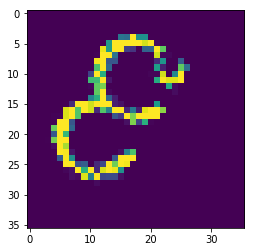

expected: 
[[1.]]
<NDArray 1x1 @cpu(0)>| actual: 
[[1.]]
<NDArray 1x1 @cpu(0)>


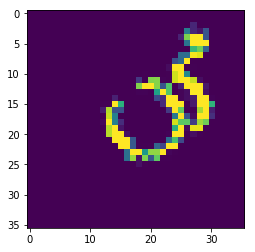

expected: 
[[1.]]
<NDArray 1x1 @cpu(0)>| actual: 
[[1.]]
<NDArray 1x1 @cpu(0)>


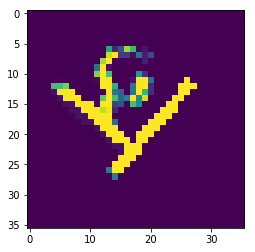

expected: 
[[0.]]
<NDArray 1x1 @cpu(0)>| actual: 
[[0.]]
<NDArray 1x1 @cpu(0)>


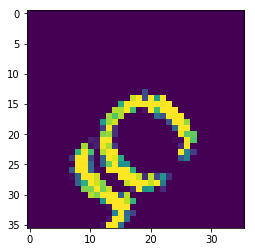

expected: 
[[1.]]
<NDArray 1x1 @cpu(0)>| actual: 
[[1.]]
<NDArray 1x1 @cpu(0)>


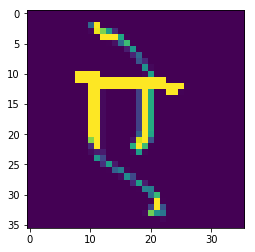

expected: 
[[0.]]
<NDArray 1x1 @cpu(0)>| actual: 
[[0.999]]
<NDArray 1x1 @cpu(0)>


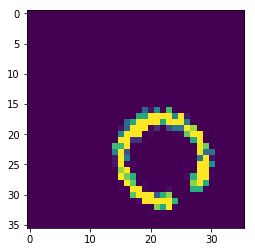

expected: 
[[1.]]
<NDArray 1x1 @cpu(0)>| actual: 
[[1.]]
<NDArray 1x1 @cpu(0)>


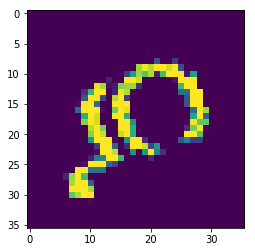

expected: 
[[1.]]
<NDArray 1x1 @cpu(0)>| actual: 
[[1.]]
<NDArray 1x1 @cpu(0)>


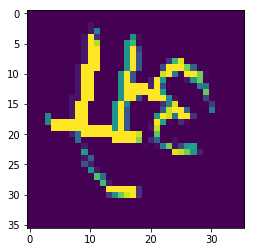

expected: 
[[0.]]
<NDArray 1x1 @cpu(0)>| actual: 
[[0.]]
<NDArray 1x1 @cpu(0)>


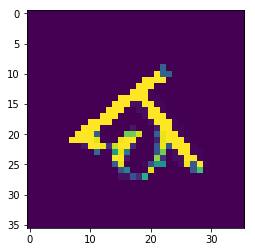

expected: 
[[0.]]
<NDArray 1x1 @cpu(0)>| actual: 
[[0.]]
<NDArray 1x1 @cpu(0)>


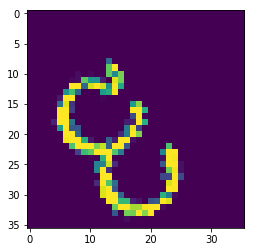

expected: 
[[1.]]
<NDArray 1x1 @cpu(0)>| actual: 
[[1.]]
<NDArray 1x1 @cpu(0)>
Test accuracy: 0.966


In [7]:
import Project_Steele_Virag_Tiemon_Gluon_Reimplement

### PyTorch
The PyTorch implementation of the TfCnn-MyaDev_For_HW4.py network got around 94% accuracy when successful, but approximately one fifth of the time the network does not learn and finishes with 50% accuracy. We suspect that this fluctuation in accuracy happens due to the random initialization of weights when building the network, however, we found it interesting that it only occurred in the PyTorch framework and not in either of the other frameworks. It also gave us the impression that the PyTorch framework may not be as advanced as TensorFlow and Gluon.  
  
This PyTorch implementation can be run in the following cell:

Generating training set...
Training...


/Users/liamtiemon/AnacondaProjects/CSC-494-Deep-Learning/Project_Steele_Virag_Tiemon_Pytorch_Reimplement.py:174: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  print ('Epoch [%d/%d]: Loss: %.4f' %(epoch+1, num_epochs, loss.data[0]))


Epoch [1/4]: Loss: 0.4900
Epoch [2/4]: Loss: 0.5000
Epoch [3/4]: Loss: 0.0657
Epoch [4/4]: Loss: 0.0268
Generating test set...
Testing...


/Users/liamtiemon/AnacondaProjects/CSC-494-Deep-Learning/Project_Steele_Virag_Tiemon_Pytorch_Reimplement.py:102: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if abs(pred[i].data[0] - lab[i]) < 0.33:


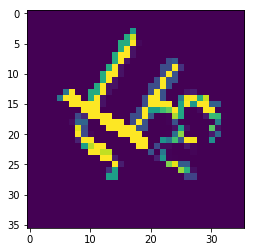

expected: tensor(0.) | actual: 0.1584


/Users/liamtiemon/AnacondaProjects/CSC-494-Deep-Learning/Project_Steele_Virag_Tiemon_Pytorch_Reimplement.py:217: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  print("expected: " + str(lab[i]) + " | actual: %.4f" %(pred[i].data[0]))


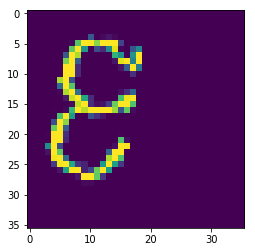

expected: tensor(1.) | actual: 1.0000


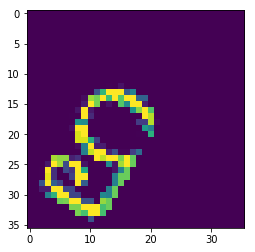

expected: tensor(1.) | actual: 0.9941


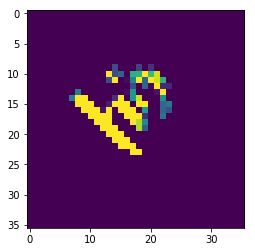

expected: tensor(0.) | actual: 0.0862


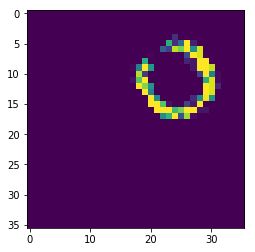

expected: tensor(1.) | actual: 0.9731
Test accuracy: 89.95%


In [8]:
import Project_Steele_Virag_Tiemon_Pytorch_Reimplement

## Designing New Networks
### Gluon

For our own network design in Gluon, we initially tried using SGD as our training algorithm and Mean Squared Error for loss. This was effective but took a long time to produce results. In an effort to make the network learn more quickly, we added a batch normalization layer, second convolution layer, dropout layer, and a second hidden layer. There was some improvement, but training was still slow. We then tried to use the Adam optimizer for our training algorithm instead and found that it trained very quickly, hitting its accuracy threshold and stopping almost immediately. We changed the network to run for the maximum number of epochs and found that rather than overfitting the network, it consistently hit accuracy ratios of above 98%.  
  
This Gluon implementation can be run in the following cell:

Generating training set...
Generating test set...
Training...
Epoch 0. Current Accuracy: 0.9185333333333333. Current Loss: 0.0022541338112205267.
Epoch 1. Current Accuracy: 0.9925666666666667. Current Loss: 6.155345181468874e-05.
Epoch 2. Current Accuracy: 0.9944. Current Loss: 0.00018144007481168956.
Epoch 3. Current Accuracy: 0.9963. Current Loss: 5.449539912660839e-06.
Epoch 4. Current Accuracy: 0.9937. Current Loss: 0.0020244629122316837.
Testing...


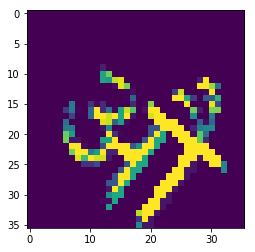

expected: 
[[0.000]]
<NDArray 1x1 @cpu(0)>| actual: 
[[0.999]]
<NDArray 1x1 @cpu(0)>


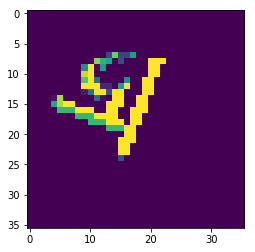

expected: 
[[0.000]]
<NDArray 1x1 @cpu(0)>| actual: 
[[0.000]]
<NDArray 1x1 @cpu(0)>


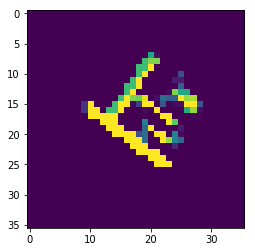

expected: 
[[0.000]]
<NDArray 1x1 @cpu(0)>| actual: 
[[0.000]]
<NDArray 1x1 @cpu(0)>


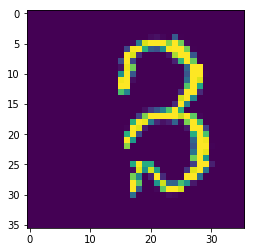

expected: 
[[1.000]]
<NDArray 1x1 @cpu(0)>| actual: 
[[1.000]]
<NDArray 1x1 @cpu(0)>


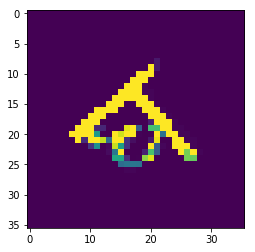

expected: 
[[0.000]]
<NDArray 1x1 @cpu(0)>| actual: 
[[0.000]]
<NDArray 1x1 @cpu(0)>


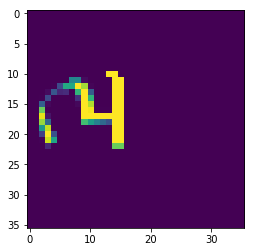

expected: 
[[0.000]]
<NDArray 1x1 @cpu(0)>| actual: 
[[0.000]]
<NDArray 1x1 @cpu(0)>


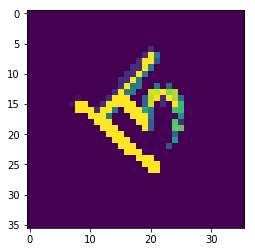

expected: 
[[0.000]]
<NDArray 1x1 @cpu(0)>| actual: 
[[0.000]]
<NDArray 1x1 @cpu(0)>


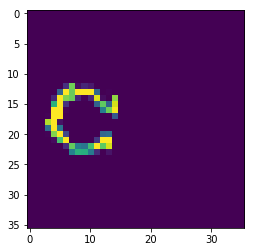

expected: 
[[1.000]]
<NDArray 1x1 @cpu(0)>| actual: 
[[1.000]]
<NDArray 1x1 @cpu(0)>


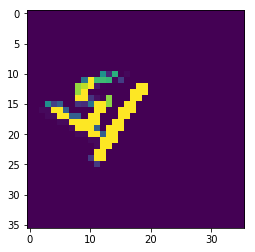

expected: 
[[0.000]]
<NDArray 1x1 @cpu(0)>| actual: 
[[0.000]]
<NDArray 1x1 @cpu(0)>


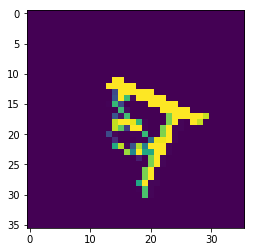

expected: 
[[0.000]]
<NDArray 1x1 @cpu(0)>| actual: 
[[0.000]]
<NDArray 1x1 @cpu(0)>
Test accuracy: 99.29%


In [10]:
import Project_Steele_Virag_Tiemon_Gluon_Redesign

### PyTorch
In PyTorch, we started with Adam as the optimizer for the training algorithm. However, we began with Mean Absolute Error, mistakenly thinking that PyTorch did not offer Mean Squared Error because the PyTorch version of that function was named differently than in Gluon. Once we identified this, we switched to MSE and got significantly better results. We also gradually increased the training set size which also helped, and changed our network design to include another convolutional and dense layer just like in our Gluon implementation since it has proven to increase the network's accuracy. However, it was interesting that adding a dropout layer actually slightly decreased the network's accuracy, which is the opposite of what happened in the Gluon implementation. Overall, our final results achieved around 97% accuracy, although that rate fluctuated more than that of our Gluon network.

Across both the existing networks and our designs, PyTorch routinely had less reliable and consistent results than Gluon.  
  
This PyTorch implementation can be run in the following cell:

Generating training set...
Training...


/Users/liamtiemon/AnacondaProjects/CSC-494-Deep-Learning/Project_Steele_Virag_Tiemon_Pytorch_Redesign.py:177: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  print ('Epoch [%d/%d]: Loss: %.4f' %(epoch+1, num_epochs, loss.data[0]))


Epoch [1/8]: Loss: 0.0227
Epoch [2/8]: Loss: 0.0034
Epoch [3/8]: Loss: 0.0119
Epoch [4/8]: Loss: 0.0021
Epoch [5/8]: Loss: 0.0016
Epoch [6/8]: Loss: 0.0004
Epoch [7/8]: Loss: 0.0019
Epoch [8/8]: Loss: 0.0000
Generating test set...
Testing...


/Users/liamtiemon/AnacondaProjects/CSC-494-Deep-Learning/Project_Steele_Virag_Tiemon_Pytorch_Redesign.py:104: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if abs(pred[i].data[0] - lab[i]) < 0.33:


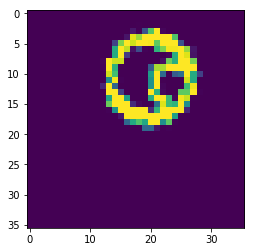

expected: tensor(1.) | actual: 1.0000


/Users/liamtiemon/AnacondaProjects/CSC-494-Deep-Learning/Project_Steele_Virag_Tiemon_Pytorch_Redesign.py:220: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  print("expected: " + str(lab[i]) + " | actual: %.4f" %(pred[i].data[0]))


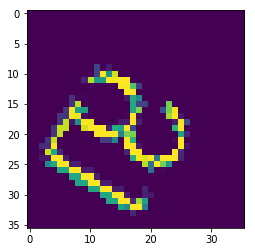

expected: tensor(1.) | actual: 1.0000


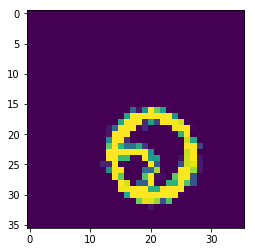

expected: tensor(1.) | actual: 1.0000


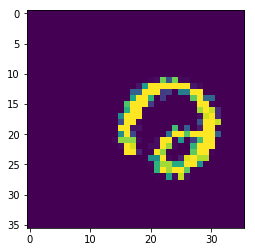

expected: tensor(1.) | actual: 1.0000


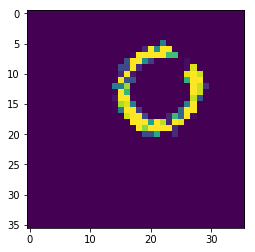

expected: tensor(1.) | actual: 1.0000
Test accuracy: 97.57%


In [11]:
import Project_Steele_Virag_Tiemon_Pytorch_Redesign

# Conclusion

After working with both of these frameworks, we concluded that Gluon is a powerful and easy-to-use framework that could potentially compete with TensorFlow in the future since it offers the same features and tools, and produces consistent results that are very similar to TensorFlow's. On the other hand, we found that working with PyTorch requires the implementation of additional classes and features that are already pre-implemented in TensorFlow and Gluon, and it also produces less consistent and accurate results. Therefore, our conclusion is that the PyTorch framework has to improve in its consistency and accuracy, while it also has to provide more built-in features and require less complicated implementations of neural network layers in order to compete with TensorFlow and Gluon.